In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('../input/titanic/train.csv')

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

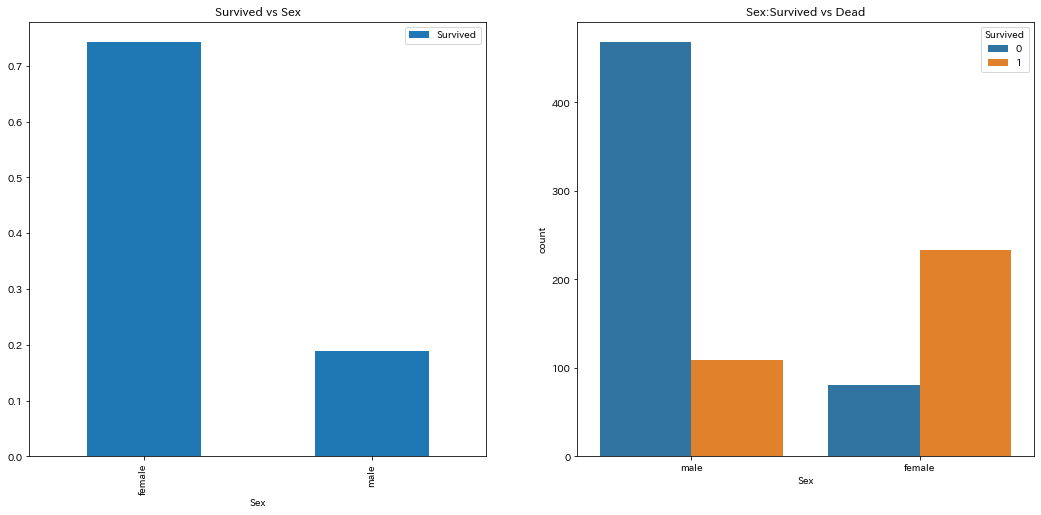

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [30]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

AttributeError: 'DataFrame' object has no attribute 'Initial'

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Initial','Survived']].groupby(['Initial']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Initial')
sns.countplot('Initial',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Deck:Survived vs Initial')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Deck','Survived']].groupby(['Deck']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Deck')
sns.countplot('Deck',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Deck:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([data.Sex,data.Survived], data.Deck, normalize='index').style.background_gradient(cmap='summer_r') #Checking the Deck with the Sex

In [ ]:
pd.crosstab([data.Sex,data.Survived], data.Deck).style.background_gradient(cmap='summer_r') #Checking the Deck with the Sex

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Room','Survived']].groupby(['Room']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Room')
sns.countplot('Room',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Room:Survived vs Dead')
plt.show()

In [ ]:
# 変数Name, Ticket, Cabinを除外する
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# それぞれのカテゴリ変数にlabel encodingを適用する
for c in ['Sex', 'Embarked', 'Initial', 'Deck', 'Room']:
    # 学習データに基づいてどう変換するかを定める
    le = LabelEncoder()
    le.fit(data[c].fillna('NA'))

    # 学習データ、テストデータを変換する
    data[c] = le.transform(data[c].fillna('NA'))

In [ ]:
sns.heatmap(data.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)